In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
df=pd.read_csv('C:\\Users\\Awadhesh\\dataset1\\Advertising.csv')

In [8]:
df.head()

,SN,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
df.shape

(200, 5)

Visualizing data

In [10]:
# allow plots to appear within the notebook
%matplotlib inline

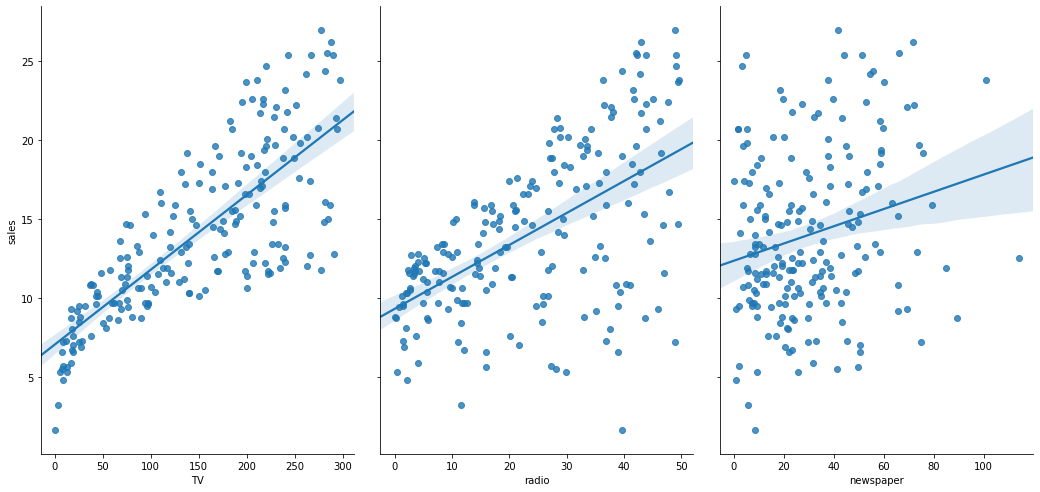

In [11]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

create a Python list of feature names

In [12]:
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# Above command we can typein single  line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
#X = data[['TV', 'Radio', 'Newspaper']]

X.head()


,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


check the type and shape of X

In [13]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


select a Series from the DataFrame

In [23]:
y = df['sales']
#y = df.sales        #(Same as above)
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

check the type and shape of y

In [26]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


Splitting X and y into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

default split is 75% for training and 25% for testing

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


Linear regression in scikit-learn

In [29]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Interpreting model coefficients

In [30]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


Making predictions

In [31]:
y_pred = linreg.predict(X_test)

Model evaluation metrics for regression

Computing the RMSE for our Sales predictions

In [37]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


Feature selection

Here Newspaper does not "belong" in our model, means this does notimprove the quality of our predictions?

Let's remove it from the model and check the RMSE!

In [47]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


and here The RMSE decreased when we removed Newspaper from the model,and a lower number for RMSE is better